# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import your libraries


# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# IF YOU GET AN ERROR HERE run: pip install scikit-image
from skimage import io
from skimage.color import rgb2gray


# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
# import we will need later on

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 

df = pd.read_csv("data/fashion-small.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [4]:
# 2. Inspect / remove null values. 

df.isnull().sum().sum()


0

### Check for duplicates

In [5]:
# 3. Inspect / remove duplicate rows. 

df.duplicated().sum()

0

In [6]:
df.duplicated().value_counts()

False    6000
dtype: int64

No duplicates or nulls to remove

### Lets look at our class balances

In [7]:
# 4. Print out the number examples in each class aka the class balances. 
df["label"].value_counts()

Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

In [8]:
df["label"].value_counts(normalize=True)

Sandal         0.107667
Trouser        0.102000
Ankle boot     0.100833
Shirt          0.100167
Pullover       0.099667
Coat           0.099500
T-shirt/top    0.098333
Dress          0.097500
Bag            0.097333
Sneaker        0.097000
Name: label, dtype: float64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [9]:
# Grabs all of the columns 

pixel_cols = df.columns

# can convert it to a list right here

print(type(pixel_cols))


# Convert the all columns object into a regular list

pixel_cols = list(pixel_cols)


# Sanity check that it is now just a list.
print(type(pixel_cols))


# Remove just the label column from the list

pixel_cols.remove("label")

# maybe put this in an if conditional just in case I need to rerun
# to avoid errors



<class 'pandas.core.indexes.base.Index'>
<class 'list'>


In [10]:
pixel_cols

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

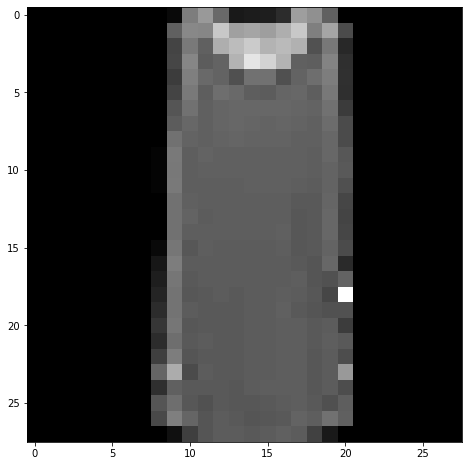

In [11]:
# Select just the pixel columns and convert them to a numpy array by using .values. 

imgs = df[pixel_cols].values


# Select just one image from all the images

img = imgs[0]

# Reshape the image to be a 28x28 matrix (original format of image)


img = img.reshape(28,28)


# Plot reshaped image

plt.figure(figsize=(8,8))

plt.imshow(img, cmap="gray")

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [12]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns

# could use pixel_cols




# Convert the all columns object into a regular list

selected_features = list(selected_features)


# Sanity check that it is now just a list.

print(type(selected_features))


# Remove the label column from the list
# This happnes 'in place'

selected_features.remove("label")


<class 'list'>


### 2. Define our `X` and `y`

In [13]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df["label"]

# I want to try redoing this with a num_pixels feature

# could also try pixel intensity and average pixel intensity

### 3. Train-test-split our `X` and `y` data

In [14]:
# 3. Train-test-split our `X` and `y` data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [15]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier

model = svm.SVC()

In [16]:
# 2. Fit that model with our training data. 

model.fit(X_train, y_train)


SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [17]:
### 1. Get and print a baseline accuracy score.
accuracy =  model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

# no num_pixels 0.848667

Accuracy 0.829333


### 2. Make new predictions using our test data. 

In [18]:
### 2. Make new predictions using our test data. 

y_pred = model.predict(X_test)


### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [19]:
### 3. Print the classification report. 

print(metrics.classification_report(y_test, y_pred))

#0.85 without num_pixels


              precision    recall  f1-score   support

  Ankle boot       0.92      0.94      0.93       139
         Bag       0.98      0.92      0.95       135
        Coat       0.68      0.79      0.73       135
       Dress       0.74      0.88      0.80       130
    Pullover       0.78      0.78      0.78       162
      Sandal       0.97      0.93      0.95       178
       Shirt       0.61      0.46      0.52       167
     Sneaker       0.86      0.91      0.89       133
 T-shirt/top       0.75      0.82      0.78       157
     Trouser       1.00      0.93      0.96       164

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



### 4. Plot the confusion matrix of our predicted results. 

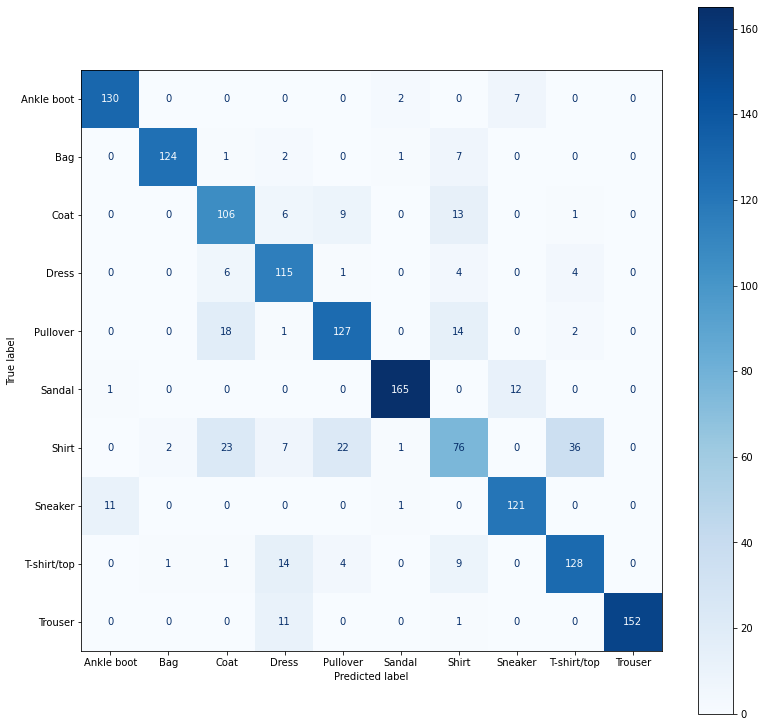

In [20]:
### 4. Plot the confusion matrix of our predicted results.

fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")


Shirts and Tshirts/tops were the most mistaken with pullovers and coats being second

Shirts were wrongfully classified alot and a lot of items were incorrectly labeled as shirts

Should probably change the colors used to make it easier to read

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [21]:
print('The classifier mistaked Shirts and Tshirts/tops the most.')

# it confused 37 between the  both of them

print('25 shirts wre misclassified as Tshirts/tops')

# 58 shirts were not classified as shirts

# 47 items which were not shirts were classified as shirts

# 41 things were classified as coats which were not coats

The classifier mistaked Shirts and Tshirts/tops the most.
25 shirts wre misclassified as Tshirts/tops


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [22]:
### Build a function thats input is an empty model, X, and y data, and runs the
#whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    
    
    print("Running report for model", model)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state) 
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax,
                                  cmap="Blues")
    
    return model

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

Running report for model LogisticRegression()
              precision    recall  f1-score   support

  Ankle boot       0.92      0.94      0.93       160
         Bag       0.91      0.94      0.93       148
        Coat       0.69      0.74      0.71       150
       Dress       0.80      0.83      0.81       145
    Pullover       0.76      0.73      0.74       162
      Sandal       0.93      0.86      0.90       161
       Shirt       0.61      0.52      0.56       153
     Sneaker       0.85      0.90      0.87       141
 T-shirt/top       0.69      0.74      0.71       140
     Trouser       0.94      0.94      0.94       140

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500



C:\Users\Pulsar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

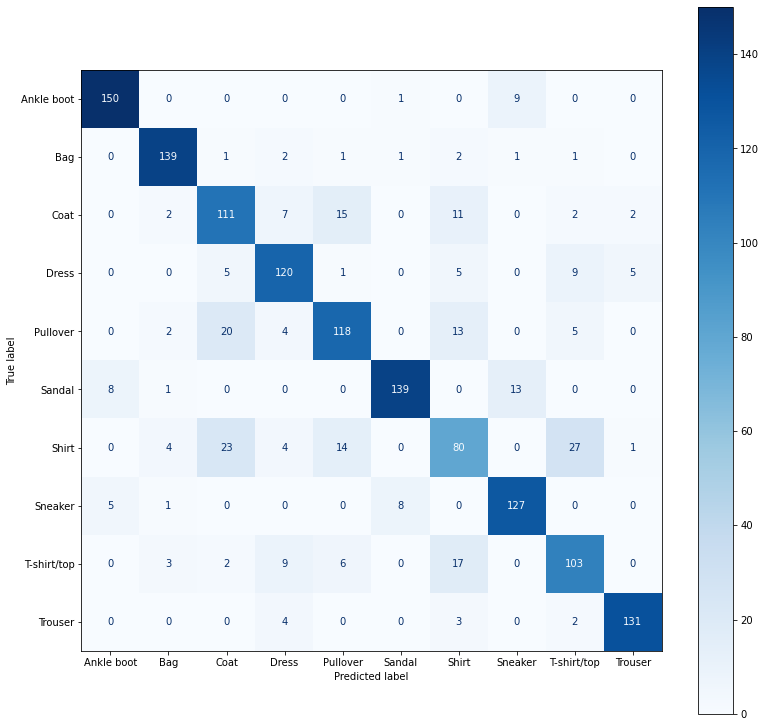

In [23]:
# LogisticRegression


lr = LogisticRegression()

build_and_eval_model(lr, X, y)

# 81% so slighlty worse

# did not converge so will try increasing the number of iterations

Running report for model RandomForestClassifier()
              precision    recall  f1-score   support

  Ankle boot       0.92      0.92      0.92       160
         Bag       0.90      0.97      0.93       148
        Coat       0.69      0.80      0.74       150
       Dress       0.83      0.93      0.88       145
    Pullover       0.80      0.78      0.79       162
      Sandal       0.95      0.91      0.93       161
       Shirt       0.70      0.51      0.59       153
     Sneaker       0.87      0.90      0.89       141
 T-shirt/top       0.81      0.81      0.81       140
     Trouser       0.98      0.94      0.96       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.84      1500
weighted avg       0.85      0.85      0.84      1500



RandomForestClassifier()

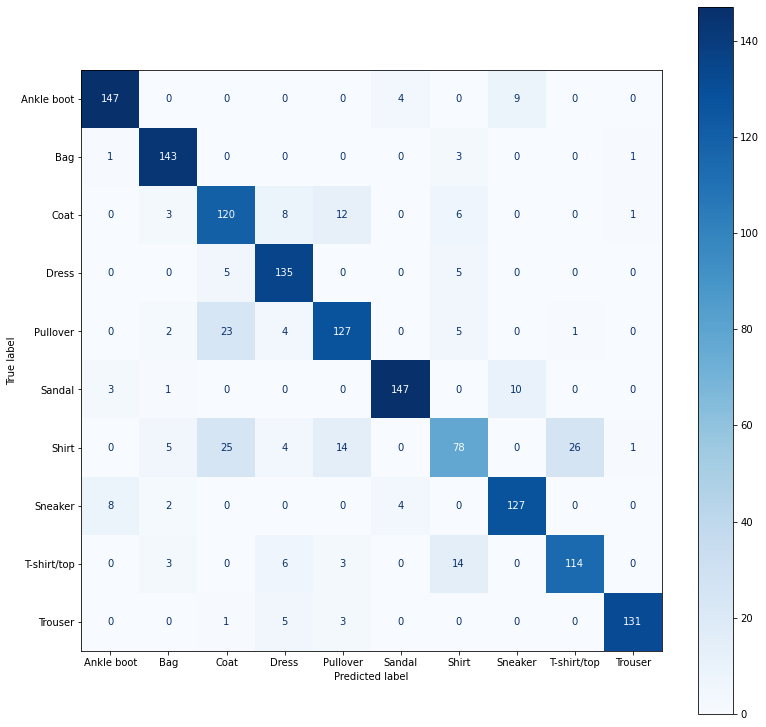

In [24]:
# RandomForest

rf = RandomForestClassifier()

build_and_eval_model(rf, X, y)

# 84% so slightly worse but very close

# value changed when running a second time

Running report for model MultinomialNB()
              precision    recall  f1-score   support

  Ankle boot       0.70      0.86      0.78       160
         Bag       0.87      0.84      0.85       148
        Coat       0.44      0.59      0.50       150
       Dress       0.67      0.90      0.77       145
    Pullover       0.67      0.60      0.64       162
      Sandal       0.78      0.09      0.16       161
       Shirt       0.28      0.13      0.18       153
     Sneaker       0.53      0.91      0.67       141
 T-shirt/top       0.72      0.80      0.76       140
     Trouser       0.96      0.90      0.93       140

    accuracy                           0.65      1500
   macro avg       0.66      0.66      0.62      1500
weighted avg       0.66      0.65      0.62      1500



MultinomialNB()

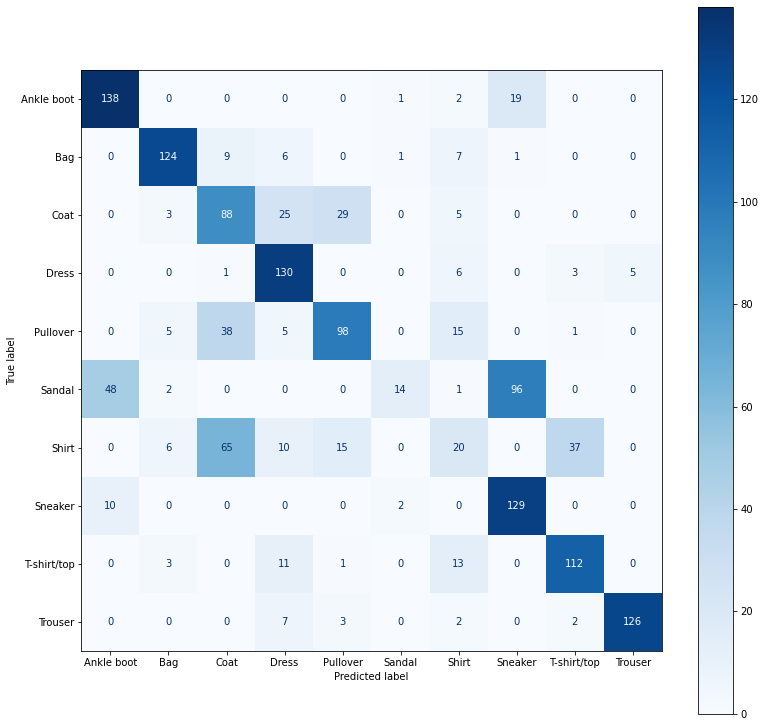

In [25]:
# MultinomialNB

mnb = MultinomialNB()

build_and_eval_model(mnb, X, y)


# 66% so alot worse

In [26]:
print('The original SVC model did the best and the nultinomial NB model did the worst.')

The original SVC model did the best and the nultinomial NB model did the worst.


Running report for model SVC()
              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.91       160
         Bag       0.92      0.97      0.95       148
        Coat       0.78      0.85      0.81       150
       Dress       0.83      0.92      0.87       145
    Pullover       0.80      0.71      0.75       162
      Sandal       0.94      0.89      0.91       161
       Shirt       0.66      0.58      0.62       153
     Sneaker       0.85      0.89      0.87       141
 T-shirt/top       0.78      0.83      0.80       140
     Trouser       1.00      0.94      0.97       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.84      1500



SVC()

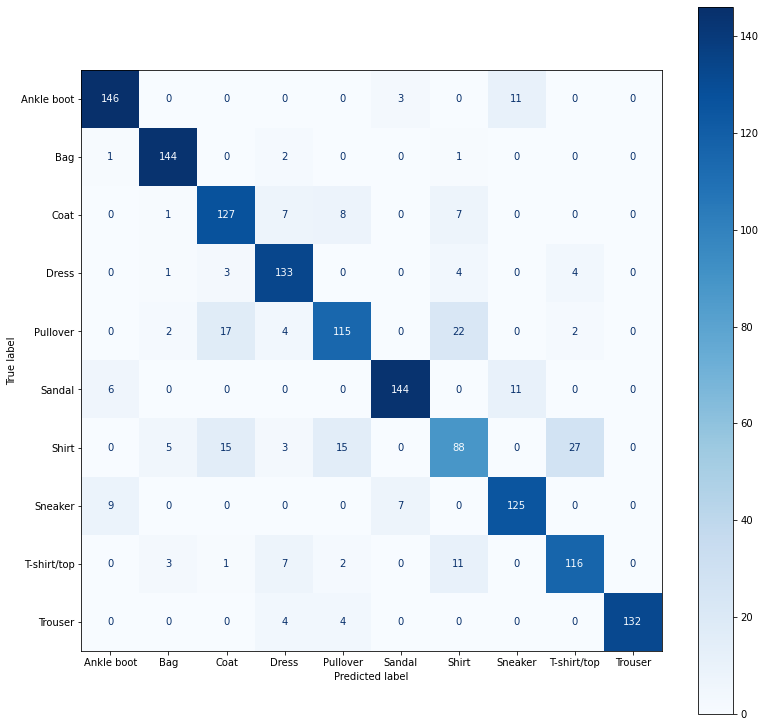

In [27]:
# original model

model = svm.SVC()

build_and_eval_model(model, X, y)

Running report for model LinearSVC()
              precision    recall  f1-score   support

  Ankle boot       0.91      0.89      0.90       160
         Bag       0.89      0.91      0.90       148
        Coat       0.58      0.76      0.66       150
       Dress       0.70      0.81      0.75       145
    Pullover       0.70      0.60      0.65       162
      Sandal       0.93      0.80      0.86       161
       Shirt       0.54      0.44      0.48       153
     Sneaker       0.82      0.89      0.85       141
 T-shirt/top       0.69      0.69      0.69       140
     Trouser       0.96      0.93      0.94       140

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500



C:\Users\Pulsar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

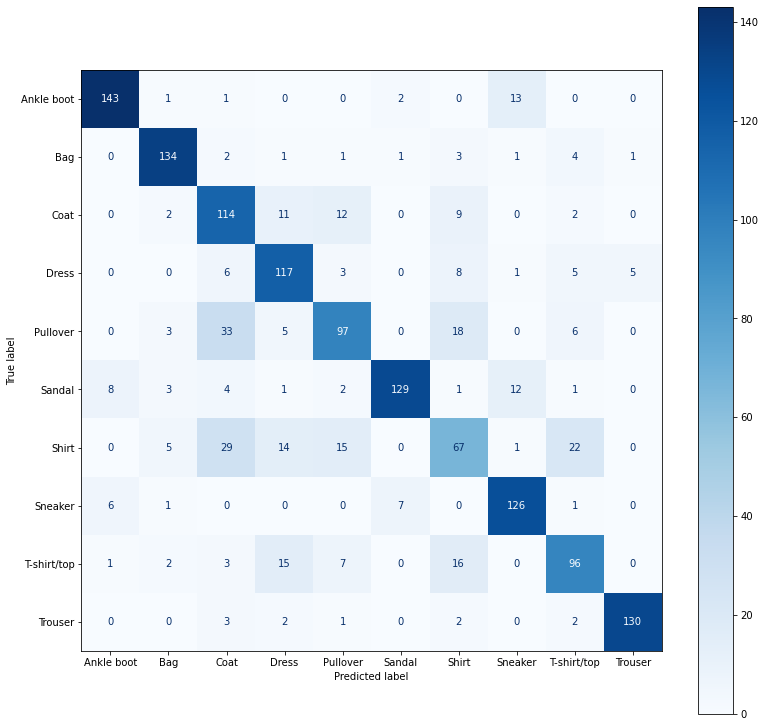

In [28]:
lsvc = svm.LinearSVC()

build_and_eval_model(lsvc, X, y)

Running report for model LinearSVC(max_iter=200)
              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.90       160
         Bag       0.88      0.93      0.90       148
        Coat       0.59      0.81      0.68       150
       Dress       0.79      0.76      0.77       145
    Pullover       0.82      0.45      0.58       162
      Sandal       0.92      0.83      0.88       161
       Shirt       0.52      0.54      0.53       153
     Sneaker       0.82      0.89      0.86       141
 T-shirt/top       0.71      0.77      0.74       140
     Trouser       0.95      0.95      0.95       140

    accuracy                           0.78      1500
   macro avg       0.79      0.78      0.78      1500
weighted avg       0.79      0.78      0.78      1500



C:\Users\Pulsar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=200)

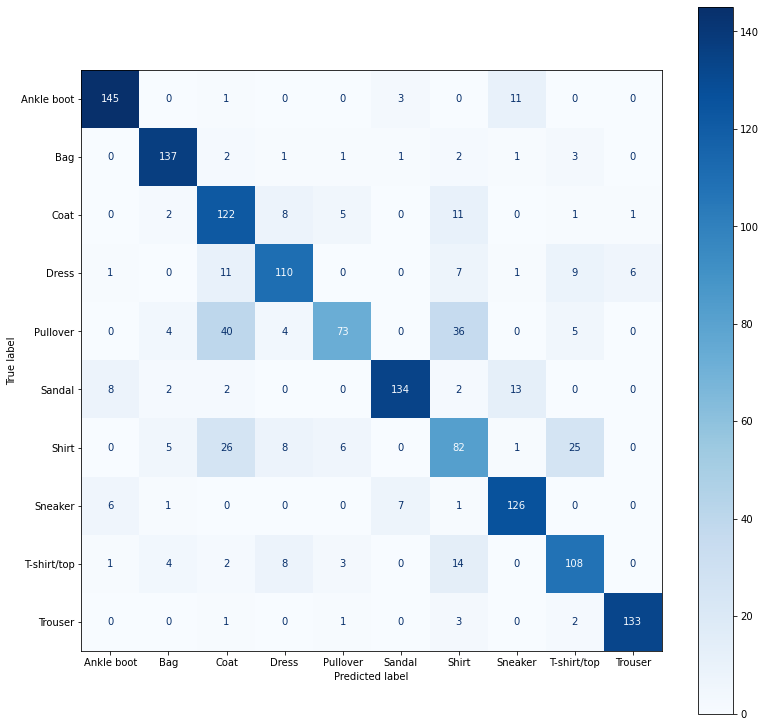

In [29]:
lsvc = svm.LinearSVC(max_iter = 200)


build_and_eval_model(lsvc, X, y)

# increasing iterations did not seem to help

# went to 2000 and saw a slight decrease in performance

Running report for model LogisticRegression(max_iter=200)
              precision    recall  f1-score   support

  Ankle boot       0.91      0.92      0.91       160
         Bag       0.90      0.91      0.91       148
        Coat       0.68      0.71      0.69       150
       Dress       0.79      0.77      0.78       145
    Pullover       0.72      0.70      0.71       162
      Sandal       0.91      0.85      0.88       161
       Shirt       0.54      0.51      0.52       153
     Sneaker       0.84      0.89      0.86       141
 T-shirt/top       0.66      0.69      0.67       140
     Trouser       0.91      0.94      0.93       140

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500



C:\Users\Pulsar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

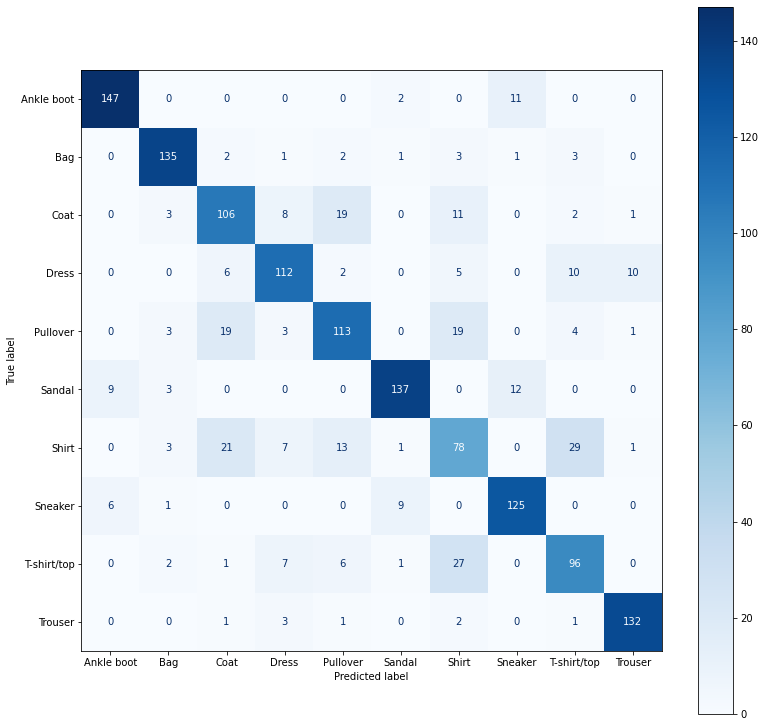

In [30]:
lr = LogisticRegression(max_iter = 200)

build_and_eval_model(lr, X, y)

# default iterations is 100

# more iterations do not seem to be help it converge

# I tried 10,000 iterations and it actually performed worse with 77% and a long run time

In [31]:
#import cv2

# a module I might want to download to try

Using num_pixels, pixel_intensity and average_pixel_intensity I mostly got worse performing models

Will do a check if only num_pixels helps

perhaps some features should be ignored as they muddy the waters

not sure why the model does not just ignore those though

Only adding num_pixels does not change the results but the other 2 make it worse

In [32]:
df["num_pixels"] = np.count_nonzero(df[pixel_cols], axis = 1)

# perhaps works

In [33]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,num_pixels
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,349
1,Trouser,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,249
2,Dress,0,0,0,0,0,0,0,0,0,...,80,0,0,0,1,0,0,0,0,441
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,316
4,Dress,0,0,0,0,0,0,0,22,53,...,78,18,0,2,0,0,0,0,0,452


In [34]:
#df["pixel_intensity"] = df[pixel_cols].sum(axis=1)

In [35]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,num_pixels
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,349
1,Trouser,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,249
2,Dress,0,0,0,0,0,0,0,0,0,...,80,0,0,0,1,0,0,0,0,441
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,316
4,Dress,0,0,0,0,0,0,0,22,53,...,78,18,0,2,0,0,0,0,0,452


In [36]:
#df["pixel_average"] = df["pixel_intensity"]/df["num_pixels"]

# are these extra features even needed to can the computer figure it out by itself

In [37]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,num_pixels
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,349
1,Trouser,0,0,0,0,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,249
2,Dress,0,0,0,0,0,0,0,0,0,...,80,0,0,0,1,0,0,0,0,441
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,316
4,Dress,0,0,0,0,0,0,0,22,53,...,78,18,0,2,0,0,0,0,0,452


In [38]:
selected_features = list(df.columns)

In [39]:
selected_features

['label',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'p

In [40]:
selected_features.remove("label")

In [41]:
selected_features

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [42]:
X = df[selected_features]

y = df["label"]

Now to use the function to see if there are any improvements

Running report for model SVC()
              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.91       160
         Bag       0.92      0.97      0.95       148
        Coat       0.78      0.85      0.81       150
       Dress       0.83      0.92      0.87       145
    Pullover       0.80      0.71      0.75       162
      Sandal       0.94      0.89      0.92       161
       Shirt       0.66      0.58      0.62       153
     Sneaker       0.85      0.89      0.87       141
 T-shirt/top       0.78      0.83      0.80       140
     Trouser       1.00      0.94      0.97       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



SVC()

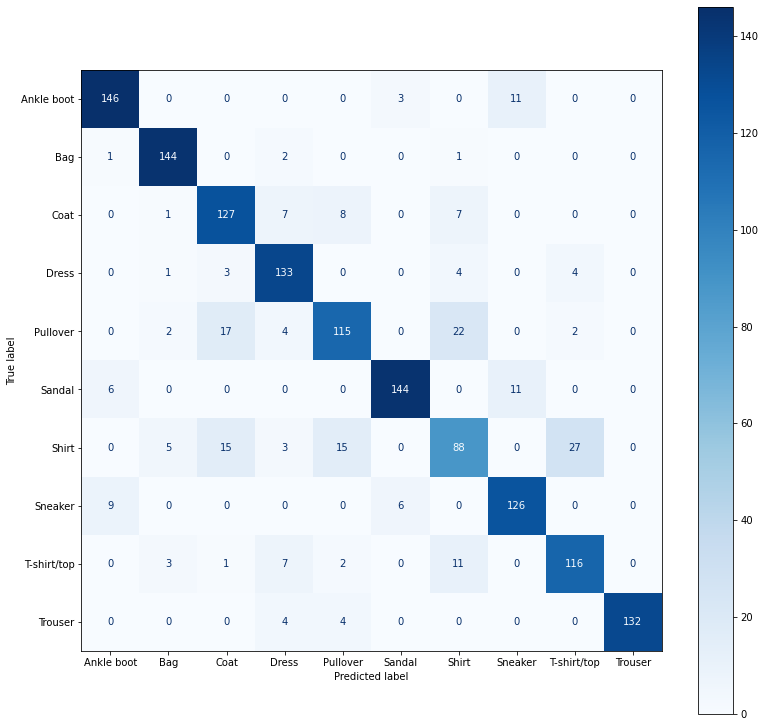

In [43]:
# original model

model = svm.SVC()

build_and_eval_model(model, X, y)


# the features I added make the model much worse

# also get a strange error

Running report for model RandomForestClassifier()
              precision    recall  f1-score   support

  Ankle boot       0.91      0.93      0.92       160
         Bag       0.93      0.97      0.95       148
        Coat       0.74      0.85      0.79       150
       Dress       0.84      0.93      0.88       145
    Pullover       0.75      0.74      0.75       162
      Sandal       0.94      0.93      0.93       161
       Shirt       0.70      0.54      0.61       153
     Sneaker       0.87      0.87      0.87       141
 T-shirt/top       0.82      0.82      0.82       140
     Trouser       0.99      0.94      0.96       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



RandomForestClassifier()

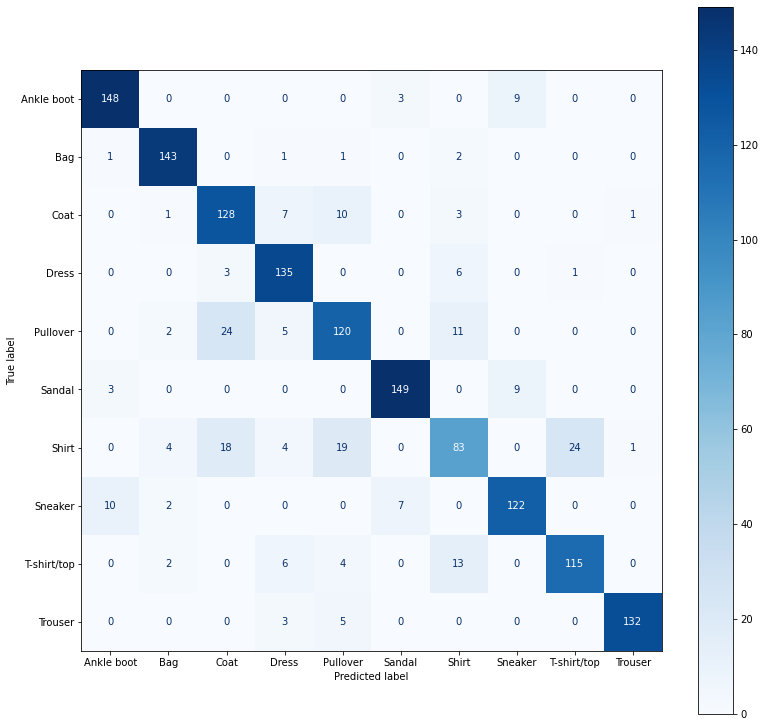

In [44]:
rf = RandomForestClassifier()

build_and_eval_model(rf, X, y)

# about the same

Running report for model LogisticRegression()


C:\Users\Pulsar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Ankle boot       0.91      0.93      0.92       160
         Bag       0.92      0.95      0.93       148
        Coat       0.71      0.76      0.74       150
       Dress       0.82      0.83      0.83       145
    Pullover       0.77      0.70      0.73       162
      Sandal       0.93      0.86      0.89       161
       Shirt       0.59      0.56      0.58       153
     Sneaker       0.84      0.89      0.87       141
 T-shirt/top       0.72      0.76      0.74       140
     Trouser       0.97      0.93      0.95       140

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



LogisticRegression()

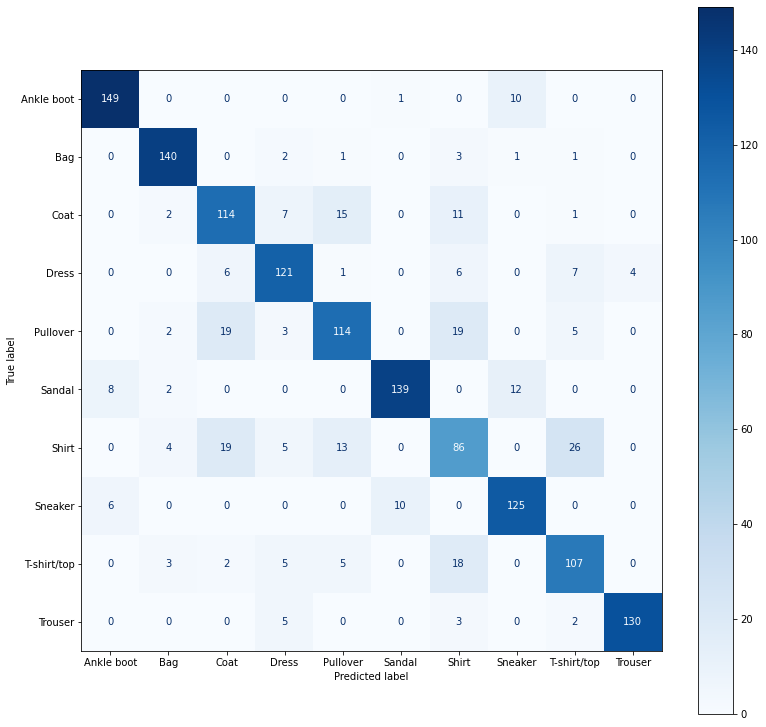

In [45]:
lr = LogisticRegression()

build_and_eval_model(lr, X, y)


# slightly worse

Running report for model MultinomialNB()
              precision    recall  f1-score   support

  Ankle boot       0.70      0.86      0.78       160
         Bag       0.87      0.84      0.85       148
        Coat       0.44      0.59      0.50       150
       Dress       0.67      0.90      0.77       145
    Pullover       0.67      0.60      0.64       162
      Sandal       0.78      0.09      0.16       161
       Shirt       0.29      0.14      0.19       153
     Sneaker       0.53      0.91      0.67       141
 T-shirt/top       0.72      0.80      0.76       140
     Trouser       0.96      0.90      0.93       140

    accuracy                           0.65      1500
   macro avg       0.66      0.66      0.62      1500
weighted avg       0.66      0.65      0.62      1500



MultinomialNB()

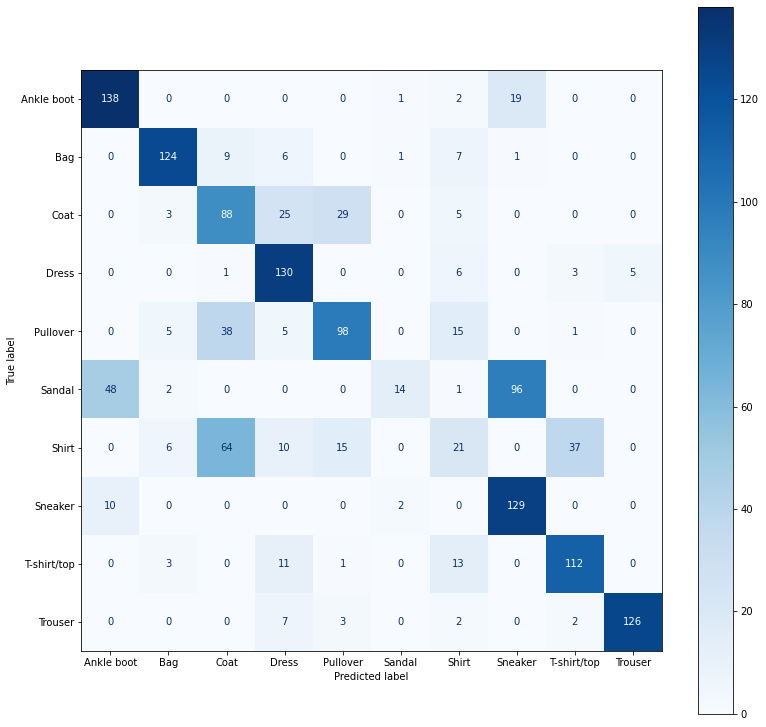

In [46]:
mnb = MultinomialNB()

build_and_eval_model(mnb, X, y)

# about the same

Running report for model LinearSVC(max_iter=200)


C:\Users\Pulsar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.90       160
         Bag       0.88      0.93      0.91       148
        Coat       0.75      0.65      0.69       150
       Dress       0.76      0.75      0.76       145
    Pullover       0.65      0.75      0.70       162
      Sandal       0.92      0.84      0.88       161
       Shirt       0.57      0.48      0.52       153
     Sneaker       0.82      0.89      0.86       141
 T-shirt/top       0.68      0.73      0.71       140
     Trouser       0.92      0.95      0.94       140

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500



LinearSVC(max_iter=200)

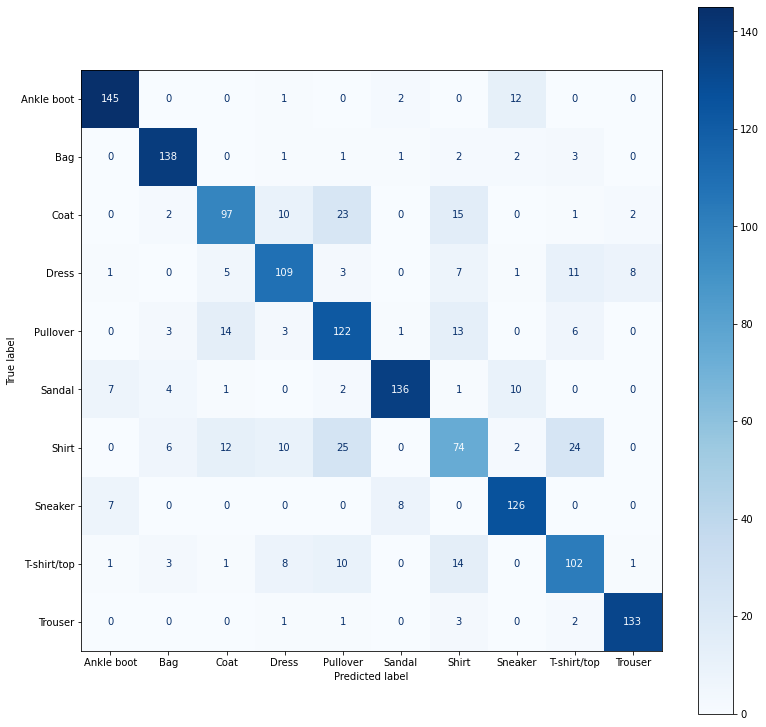

In [47]:
lsvc = svm.LinearSVC(max_iter = 200)


build_and_eval_model(lsvc, X, y)


# slight improvement

# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 

Would be nice if it was stored in csv format

Will need to go through each folder and when storing the pixels also store the label which is the name of the folder